<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---



<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>
<center><em>et rejoignez-nous sur <a href='https://app.moncoachdata.com/discord'>Discord</a> et <a href='https://app.moncoachdata.com/youtube'>YouTube</a></em></center>



---

# Exercices Projet de Régression Logistique

**OBJECTIF : Créer un modèle de classification qui peut prédire si une personne a ou non la présence d'une maladie cardiaque en fonction des caractéristiques physiques de cette personne (âge, sexe, cholestérol, etc...)**.

**Complétez les TÂCHES écrites en gras ci-dessous.**

## Importations

**Tâche : Exécutez la cellule ci-dessous pour importer les bibliothèques nécessaires.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Données

Cette base de données contient 14 attributs physiques basés sur le test physique d'un patient. Des échantillons de sang sont prélevés et le patient effectue également un bref test d'exercice physique. Le champ "goal" (objectif) fait référence à la présence d'une maladie cardiaque chez le patient. Il s'agit d'un nombre entier (0 pour aucune présence de maladie cardiaque, 1 pour présence). En général, confirmer à 100% si un patient est atteint d'une maladie cardiaque peut être un processus assez invasif, donc si nous pouvons créer un modèle qui prédit avec précision la probabilité d'une maladie cardiaque, nous pouvons aider à éviter des procédures coûteuses et invasives.

Contenu

Informations sur les attributs :

* age - âge du patient
* sex - genre du patient
* cp (chest pain) - type de douleur thoracique (4 valeurs)
* trestbps - pression artérielle au repos
* chol - taux de cholestérol sérique en mg/dl
* fbs (fasting blood sugar) - glycémie à jeun --> 120 mg/dl
* restecg - résultats électrocardiographiques au repos (valeurs 0, 1, 2)
* thalach - fréquence cardiaque maximale atteinte
* exang - angine de poitrine à l'effort (douleur de poitrine pendant l'effort)
* oldpeak - dépression du ST induite par l'effort physique par rapport au repos
* slope - la pente du segment ST du pic d'exercice
* ca - nombre de vaisseaux majeurs (0-3) colorés par la flourosopie
* thal : 3 = normal ; 6 = défaut fixe ; 7 = défaut réversible
* target : 0 pour l'absence de maladie cardiaque, 1 pour la présence d'une maladie cardiaque

Source d'origine : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Créateurs :

Institut hongrois de cardiologie. Budapest : Andras Janosi, M.D.
Hôpital universitaire, Zurich, Suisse : William Steinbrunn, M.D.
Hôpital universitaire, Bâle, Suisse : Matthias Pfisterer, M.D.
Centre médical V.A., Long Beach et Fondation Cleveland Clinic : Robert Detrano, M.D., Ph.D.

---

**Tâche : Exécutez la cellule ci-dessous pour lire les données.**

In [3]:
# LECTURE CSV à éxécuter

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/heart.csv'
df = pd.read_csv(url)

# Sinon lecture classique en important sur Google Colab ou depuis le chemin exact
# df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

## Analyse Exploratoire de Données et Visualisation

N'hésitez pas à explorer davantage les données par vous-même.

**Tâche : Vérifiez si l'ensemble de données comporte des points de données manquants et créez un résumé statistique des features numériques comme indiqué ci-dessous.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Tâches de Visualisation

**Tâche : Créer un diagramme à barres qui montre le nombre total de comptages par valeur cible.**

<Axes: xlabel='target', ylabel='count'>

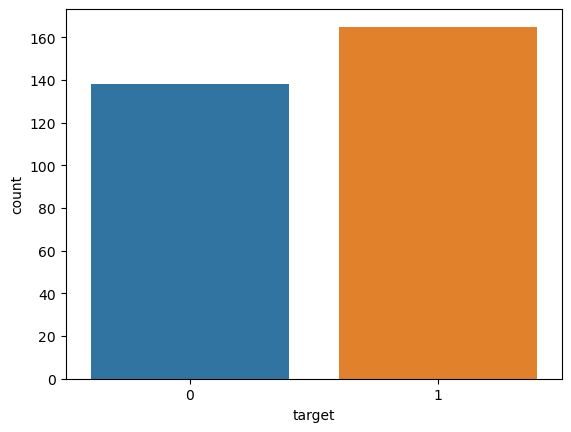

In [8]:
sns.countplot(data = df, x = "target" )

**Tâche : Créez un diagramme de paires (pairplot) qui affiche les relations entre les colonnes suivantes :**

    ['age','trestbps', 'chol','thalach','target']
   
*Note : L'exécution d'un pairplot sur l'ensemble du dataframe peut prendre beaucoup de temps en raison du nombre de features/colonnes.*

<Figure size 400x400 with 0 Axes>

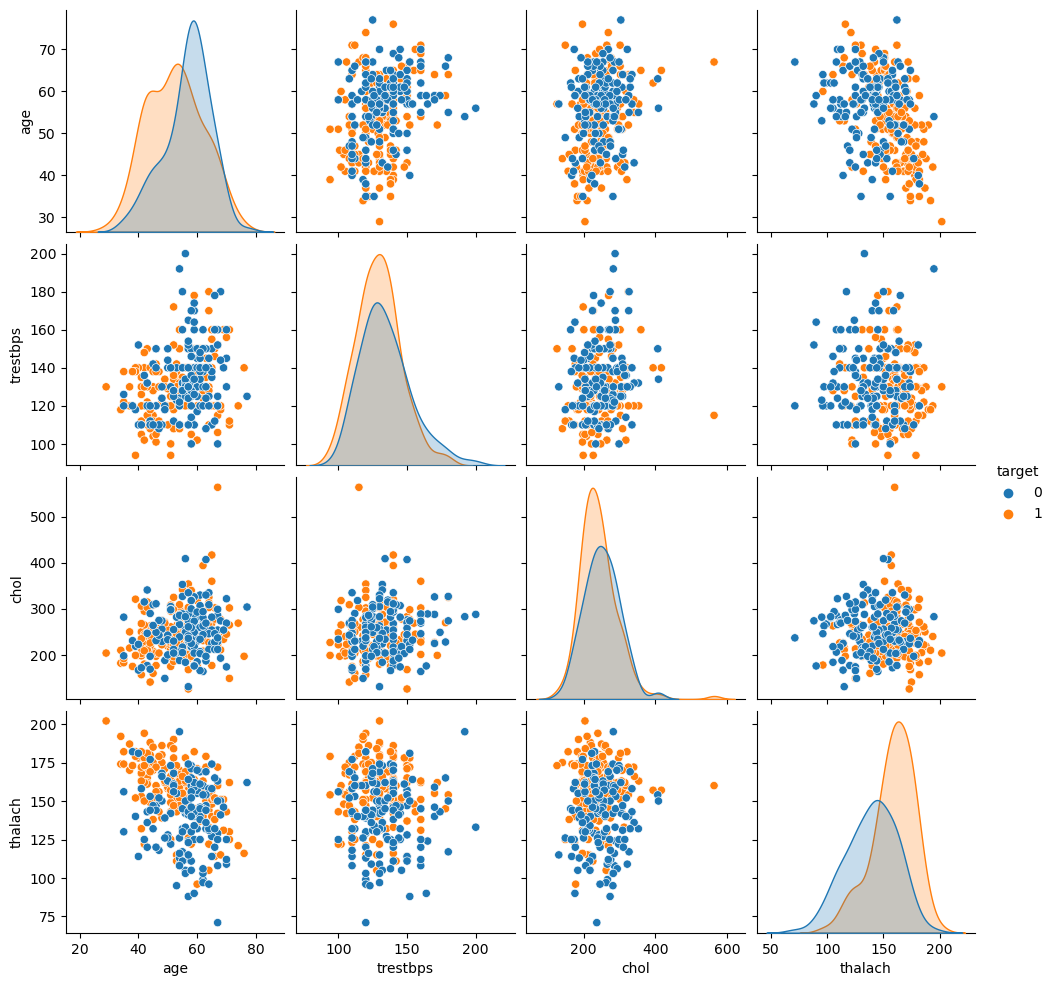

In [9]:
fig = plt.figure(figsize=(4,4), dpi=100)
liste = ['age','trestbps', 'chol','thalach']
sns.pairplot(data = df,y_vars=liste, x_vars=liste, hue = "target")

**Tâche : Créer une carte de chaleur (heatmap) qui affiche la corrélation entre toutes les colonnes.**

<Axes: >

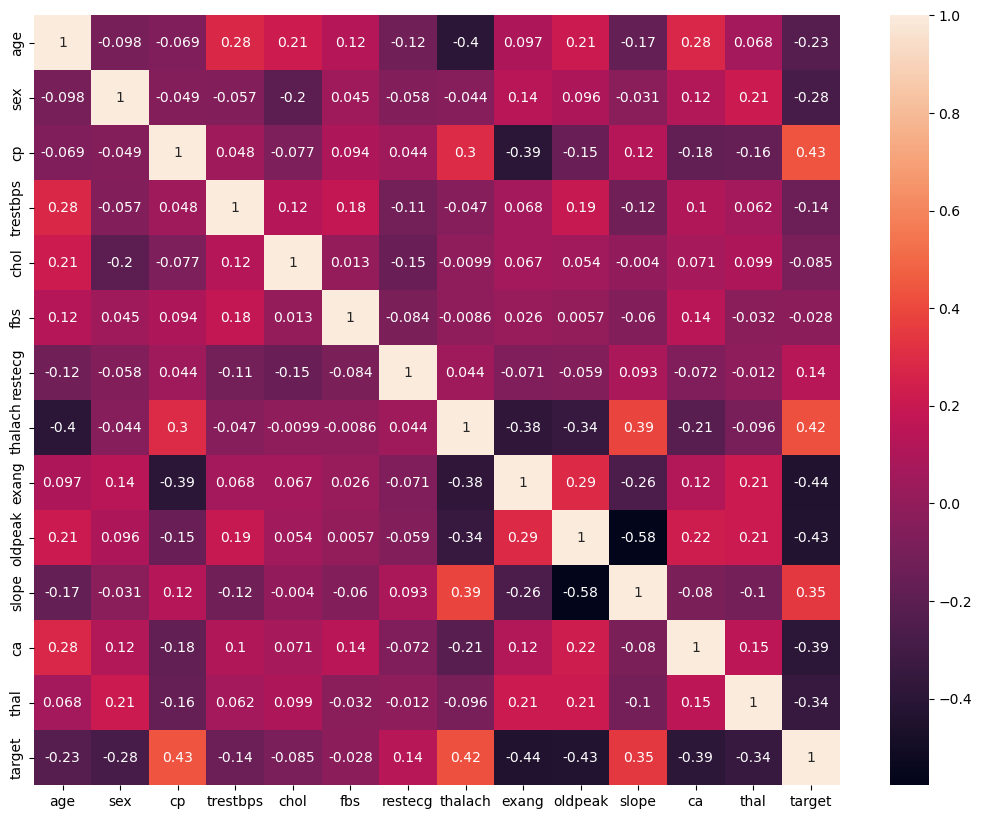

In [10]:
fig, ax = plt.subplots(figsize =(13,10))

sns.heatmap(df.corr(), annot=True, ax=ax,yticklabels=True)

---
---

# Machine Learning


## Train | Test Split et Scaling

**Tâche : Séparer les features des labels en 2 objets, X et y.**

In [11]:
x = df.drop("target", axis = 1)

In [12]:
y = df["target"]

**Tâche : Effectuer un fractionnement Entraînement / Test sur les données, avec un test_size de 10% et un random_state de 101**.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=101)

**Tâche : Créez un objet StandardScaler et normalisez les données des ensembles d'entraînement et de test. Assurez-vous de ne vous adapter qu'aux données d'entraînement pour éviter les fuites de données (connaissance des données qui s'échappe de l'ensemble de test).**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

## Modèle de régression Logistique

**Tâche : Créez un modèle de régression logistique et utilisez la validation croisée pour trouver une valeur C performante pour la recherche d'hyper-paramètres. Vous avez deux options ici, utiliser *LogisticRegressionCV* OU utiliser une combinaison de *LogisticRegression* et *GridSearchCV*. Le choix vous appartient, la solution utilise l'approche plus simple de *LogisticRegressionCV*.**

In [19]:
from sklearn.linear_model import LogisticRegressionCV

In [20]:
from sklearn.model_selection import GridSearchCV

modele =LogisticRegressionCV()

In [21]:
# help(LogisticRegressionCV)

In [22]:
modele.fit(X_train, y_train)

LogisticRegressionCV()

**Tâche : Rapportez les paramètres optimaux de votre recherche, en particulier la valeur C.** 

*Remarque : vous pouvez obtenir une valeur différente de celle indiquée ici, selon la façon dont vous avez mené votre recherche.*

In [23]:
modele.C_

array([0.04641589])

In [24]:
modele.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coefficients

**Tâche : Rapportez les coefficients du modèle.**

In [25]:
modele.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**Bonus - Tâche supplémentaire : nous ne l'avons pas montré dans les notebooks du cours, mais vous avez les compétences pour le faire ! Créez une visualisation des coefficients en utilisant un diagramme à barres de leurs valeurs. Et encore plus de points bonus si vous parvenez à trier le graphique ! Si vous êtes bloqué, n'hésitez pas à consulter rapidement le notebook des solutions pour obtenir des conseils, il existe de nombreuses façons de procéder, la solution utilise une combinaison de Pandas et de Seaborn.**

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
ma = pd.Series(index = x.columns, data =modele.coef_[0], )

In [28]:
val = ma.sort_values()

<Axes: >

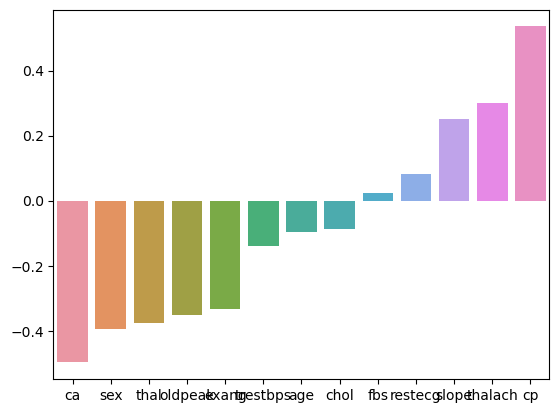

In [29]:
sns.barplot(x=val.index, y = val.values)

---

## Évaluation de la performance du modèle

**Évaluons maintenant votre modèle sur les 10% restants des données, l'ensemble de test.**

**Tâche : Créer les évaluations suivantes:**
* Tableau de la matrice de confusion
* Tracé de la matrice de confusion
* Rapport de classification

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [31]:
pred = modele.predict(X_test)

In [32]:
confusion_matrix(pred, y_test)

array([[12,  2],
       [ 3, 14]])

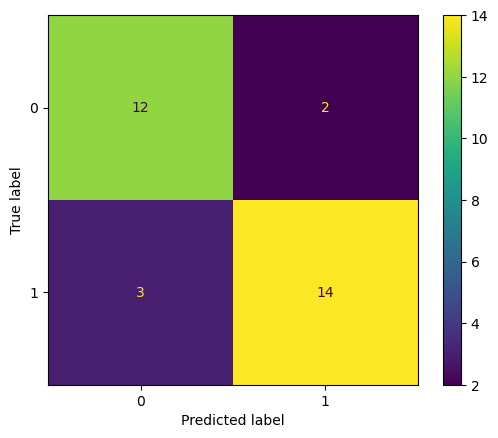

In [33]:
ConfusionMatrixDisplay.from_predictions(pred, y_test)

In [34]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Courbes de Performance

**Tâche : Créer à la fois la courbe de precision / recall et la courbe ROC.**

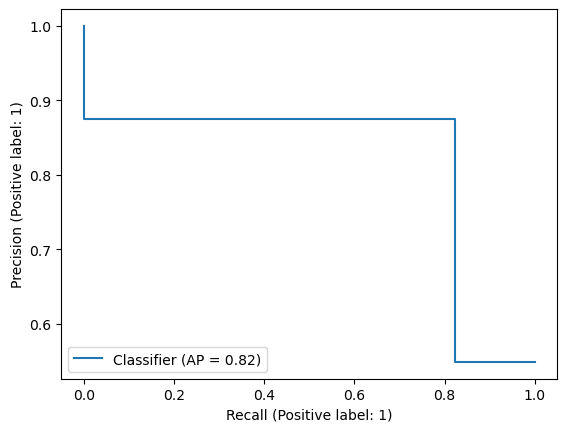

In [35]:
PrecisionRecallDisplay.from_predictions(pred, y_test)
plt.show()

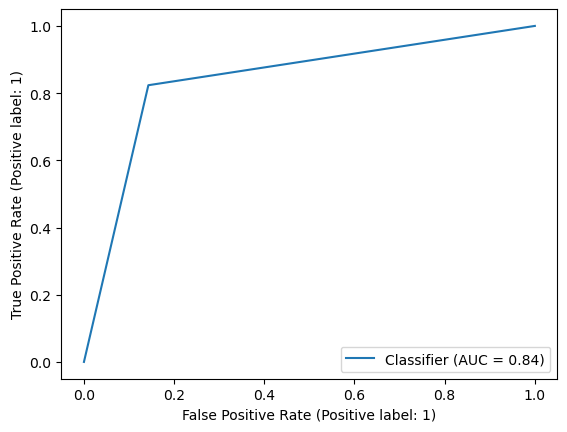

In [36]:
RocCurveDisplay.from_predictions(pred, y_test)

## Prédiction sur un nouveau patient

**Un patient présentant les caractéristiques (features) suivantes s'est présenté au cabinet médical :**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Tâche finale : Que prédit votre modèle pour ce patient ? Est-il atteint d'une maladie cardiaque ? Dans quelle mesure votre modèle est-il "sûr" de cette prédiction ?**

*Pour des raisons pratiques, nous avons créé un tableau des caractéristiques/features du patient ci-dessus.*

In [37]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [38]:
modele.predict(patient)

array([0])

In [43]:
# MISE À L'ÉCHELLE DES FEATURES DU PATIENT
patient = scaler.transform(patient)

/home/touhouegnon/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# PRÉDICTION ATTENDUE

In [41]:
modele.predict_proba(patient)

array([[0.94751173, 0.05248827]])

In [42]:
# PROBABILITÉ ATTENDUE PAR CLASSE (En fait, le modèle doit être extrêmement sûr d'être dans la classe 0).

**Bon courage !**